***Rede Neural Convolucional básica***

In [1]:
import tensorflow as tf
import keras as k
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
print(tf.__version__)
print(k.__version__)

2.12.0-rc0
2.12.0


**Criação da rede**

In [3]:
classifier = Sequential()

**Adição da primeira camada de Convolução**

In [4]:
classifier.add(Conv2D(filters=64, kernel_size=(7, 7), input_shape=(256, 256 , 3), activation='relu'))

**Adiciona a primeira camada de pooling**

In [5]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))

**Adiciona a segunda camada de convolução**

In [6]:
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

**Adiciona a segunda camada de Pooling**

In [7]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))

**Adiciona a Terceira camada de convolução**

In [8]:
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

**Adiciona a Terceira camada de Pooling**

In [9]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))

**Adiciona a quarta camada de convolução**

In [10]:
classifier.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

**Adiciona a quarta camada de Pooling**

In [11]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))

**Adiciona uma camada de Flatten para transformar o objeto 2D em 1D**

In [12]:
classifier.add(Flatten())

**Adiciona a rede neural para a previsão** 

In [13]:
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

**Compilando a rede**

In [14]:
classifier.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

***Agora deve ser feito o treinamento da IA***

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
dataPath = ''

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
training_set = train_datagen.flow_from_directory(dataPath + 'dataset_treino', target_size=(256, 256), batch_size=32, class_mode='binary')
validation_set = validation_datagen.flow_from_directory(dataPath + 'dataset_validation', target_size=(256, 256), batch_size=32, class_mode='binary')

Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [19]:
classifier.fit_generator(training_set, steps_per_epoch=4000, epochs=5,validation_data=validation_set, validation_steps=2000, verbose=0)

C:\Users\pedro\AppData\Local\Temp\ipykernel_10344\3517177598.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set, steps_per_epoch=4000, epochs=5,validation_data=validation_set, validation_steps=2000, verbose=0)


***Fazendo previsões com o modelo***

In [20]:
import numpy as np
import tensorflow.keras.utils as image
import os, shutil

In [21]:
results_prediction = [[0,0],[0,0]]
path = dataPath + 'dataset_teste/'
dogPath = 'Cachorros'
catPath = 'Gatos'

#apaga tudo dentro das pastas
# for fileName in os.listdir(dogPath):
#     filename = os.path.join(dogPath, fileName)
#     if(os.path.isfile(filename)):
#         os.remove(filename)
# for fileName in os.listdir(catPath):
#     filename = os.path.join(catPath, fileName)
#     if(os.path.isfile(filename)):
#         os.remove(filename)

index = 0
maxQtd = len(os.listdir(path + dogPath)) + len(os.listdir(path + catPath))
catCounter = 0
dogCounter = 0
#Classifica os cachorros primeiro
for fileName in os.listdir(path + dogPath):
    caminho = os.path.join(path + dogPath, fileName)
    test_image = image.load_img(caminho, target_size=(256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    
    result = classifier.predict(test_image, verbose=0)
    training_set.class_indices
    if(result[0][0] == 1):
        results_prediction[0][0] += 1
        dogCounter += 1
        prediction = 'Cachorro'
        #shutil.copy(caminho, dogPath)
    else:
        results_prediction[0][1] += 1
        catCounter += 1
        prediction = 'Gato'
        #shutil.copy(caminho, catPath)
    index += 1
    if(index % 100 == 0):
        print(f'{(index/maxQtd)*100}% ')

    
#Classifica os gatos segundamente
for fileName in os.listdir(path + catPath):
    caminho = os.path.join(path + catPath, fileName)
    test_image = image.load_img(caminho, target_size=(256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    
    result = classifier.predict(test_image, verbose=0)
    training_set.class_indices
    if(result[0][0] == 1):
        results_prediction[1][0] += 1
        dogCounter += 1
        prediction = 'Cachorro'
        #shutil.copy(caminho, dogPath)
    else:
        results_prediction[1][1] += 1
        catCounter += 1
        prediction = 'Gato'
        #shutil.copy(caminho, catPath)
    index += 1
    if(index % 100 == 0):
        print(f'{(index/maxQtd)*100}% ')
    
        

10.0% 
20.0% 
30.0% 
40.0% 
50.0% 
60.0% 
70.0% 
80.0% 
90.0% 
100.0% 


In [22]:
results_prediction

[[358, 142], [156, 344]]

In [23]:
catCounter, dogCounter

(486, 514)

***Imprime a matriz de confusão***

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
classes = ['Cachorro', 'Gato']

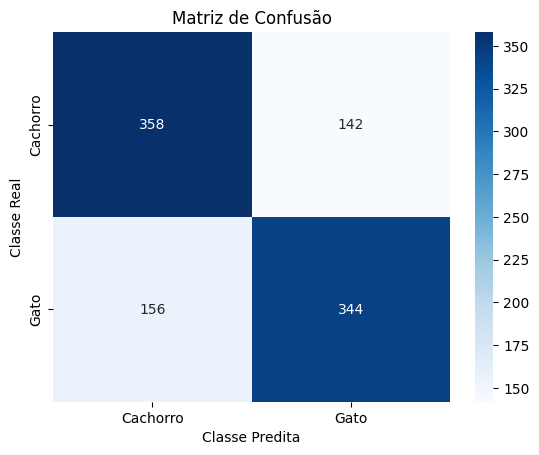

In [26]:
sns.heatmap(results_prediction, annot=True, xticklabels=classes, yticklabels=classes, fmt='d', cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()



In [27]:
def calcular_metricas(matriz, classes = None):
    if classes is None:
        classes = np.arange(matriz.shape[0])
    TP = np.diag(matriz)  # True Positives
    FP = np.sum(matriz, axis=0) - TP  # False Positives
    FN = np.sum(matriz, axis=1) - TP  # False Negatives
    TN = np.sum(matriz) - (TP + FP + FN)  # True Negatives

    # Precisão (Precision)
    precisao = TP / (TP + FP)

    # Sensibilidade (Recall) ou Taxa de Verdadeiros Positivos (TPR)
    sensibilidade = TP / (TP + FN)

    # F1
    f1 = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

    # Acurácia (Accuracy)
    acuracia = (TP + TN) / (TP + TN + FP + FN)

    metricas = {
        'precisao': {x: y for x, y in zip(classes, precisao)},
        'sensibilidade': {x: y for x, y in zip(classes, sensibilidade)},
        'f1': {x: y for x, y in zip(classes, f1)},
        'acuracia': acuracia,
    }
    
    return metricas

In [28]:
def imprimir_metricas(metricas):
    print('classe\tPrecisão\tRecall\t\tF1')
    for classe in metricas['precisao']:
        print(f'{classe}\t{metricas["precisao"][classe]:.4f}\t\t{metricas["sensibilidade"][classe]:.4f}\t\t{metricas["f1"][classe]:.4f}')
    print(f'\nAcurácia: {metricas["acuracia"][0]:.4f}')
    

In [29]:
metricas = calcular_metricas(results_prediction, classes=['Dog', 'Cat'])

In [30]:
imprimir_metricas(metricas)

classe	Precisão	Recall		F1
Dog	0.6965		0.7160		0.7061
Cat	0.7078		0.6880		0.6978

Acurácia: 0.7020


In [31]:
classifier.save